In [1]:
from torchvision import datasets as dt
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim

## Dataset

In [2]:
# load the training data
mnist = dt.MNIST('data', train=True, download=True)
mnist = list(mnist)[:2500]

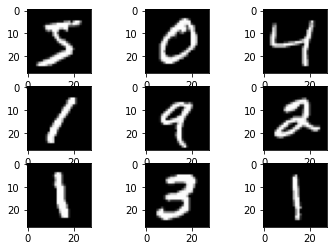

In [3]:
# plot the first 12 images in the training data
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist[:9]):
  plt.subplot(3, 3, k+1)
  plt.imshow(image, cmap='gray')

In [4]:
# transform the image data type to tensor
img_to_tensor = transforms.ToTensor()

In [5]:
# convert the last image we saw into a tensor
img_tensor = img_to_tensor(image)
img_tensor.shape

torch.Size([1, 28, 28])

In [6]:
# load the training data as tensor
mnist_train = dt.MNIST('data', train=True, transform=img_to_tensor)
mnist_train = list(mnist_train)[:2500]

In [7]:
#split data into training and validation
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

## Linear Model in PyTorch

In [8]:
# assume 50 features, 1 linear output
simple_model = nn.Linear(50, 1)

In [9]:
weight, bias = list(simple_model.parameters())

In [10]:
# By default, PyTorch initializes these values to a random number close to 0
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[-0.0825,  0.0072,  0.1284,  0.0944, -0.0600, -0.0063,  0.0844, -0.0676,
         -0.0844, -0.0463, -0.0217, -0.0725, -0.0088, -0.0460,  0.0524, -0.0929,
          0.0392, -0.0810,  0.0435,  0.0468,  0.1288, -0.0658, -0.0039,  0.0715,
         -0.0739,  0.0300,  0.1291, -0.0660, -0.0592, -0.0608,  0.0621,  0.0916,
          0.1176, -0.0704,  0.0869, -0.1409,  0.0363, -0.1363,  0.0222,  0.0848,
          0.1050, -0.0730,  0.1007,  0.0095,  0.0986,  0.0655, -0.0301,  0.1336,
          0.0593,  0.0168]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([-0.0517], requires_grad=True)
torch.Size([1])


<font color='red'>Like the example above, create the model to solve the MNIST digitclassification problem.</font>

In [11]:
############
# Your code
# Start

# Model with one hidden layer
input_size = 28*28
hidden_sizes = [64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size),
                      nn.LogSoftmax(dim=1))

# End

## Prediction

In [12]:
def run_gradient_descent(model,batch_size=64,learning_rate=0.01,weight_decay=0,num_epochs=10):
  #define the best optimizer and loss function

  ############
  # Your code
  # Start 

  # SGD optimizer
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
  # CrossEntropy loss function
  loss_function = nn.CrossEntropyLoss()

  # End
  
  iter = 0
  iters, losses = [], []
  iters_sub, train_acc, val_acc = [], [] ,[]
  
  # PyTorch data loader
  train_loader = torch.utils.data.DataLoader(
      mnist_train,
      batch_size=batch_size, # batch size
      shuffle=True) # shuffle before each epoch

  # training
  for epoch in range(num_epochs):
    ############
    # Your code
    # Start
    loss = 0
    model.train()
    for images, labels in train_loader:
      images = images.view(images.shape[0], -1)
      optimizer.zero_grad()
      output = model(images)
      CE_loss = loss_function(output, labels)
      CE_loss.backward()
      optimizer.step()

      loss += CE_loss.item()
      train_accuracy = get_accuracy(model,mnist_train)
      
      iter = iter + 1
      iters.append(iter) ## or iters_sub
      iters_sub.append(iter) ## or iters

      losses.append(loss)
      train_acc.append(train_accuracy)

      with(torch.no_grad()):
        val_acc.append(get_accuracy(model,mnist_val))
    # End

  # plotting
  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters, losses, label="Train")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()


  plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters_sub, train_acc, label="Train")
  plt.plot(iters_sub, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

def get_accuracy(model, data):
  loader = torch.utils.data.DataLoader(data, batch_size=500)

  correct, total = 0, 0
  for xs, ts in loader:
      xs = xs.view(-1, 784) # flatten the image
      zs = model(xs)
      pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(ts.view_as(pred)).sum().item()
      total += int(ts.shape[0])
      return correct / total

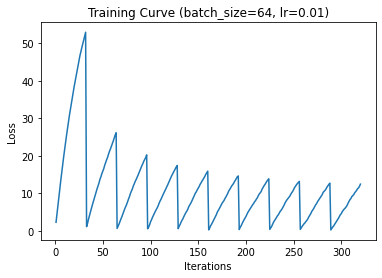

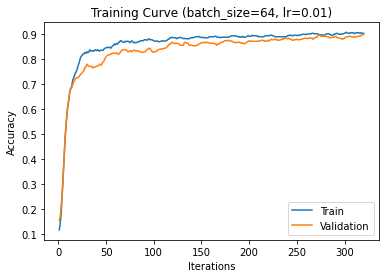

In [13]:
input_size = 28*28
output_size = 10

model = nn.Sequential(nn.Linear(input_size, output_size),
                      nn.LogSoftmax(dim=1))

run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)

<font color='red'>plot model weight for each classes</font>

weight shape : (784, 10)

bias shape : (1, 10)

torch.Size([10, 784])
torch.Size([10])


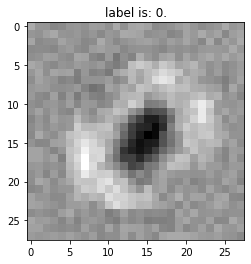

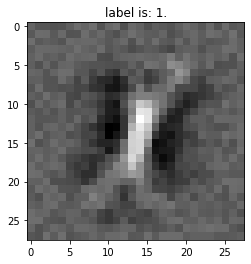

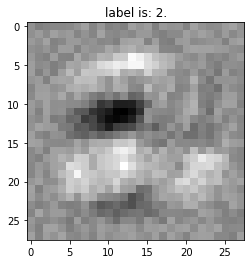

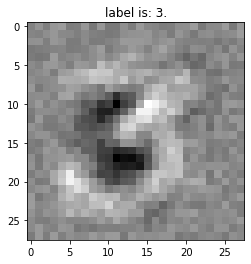

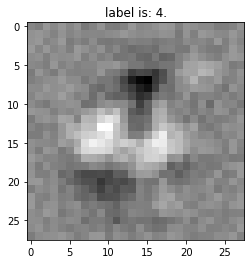

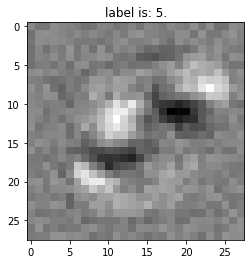

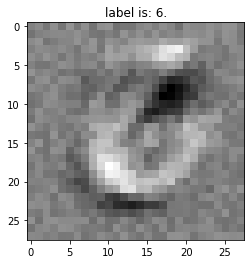

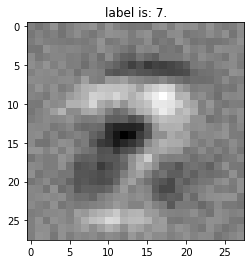

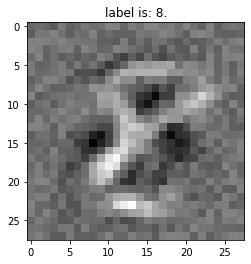

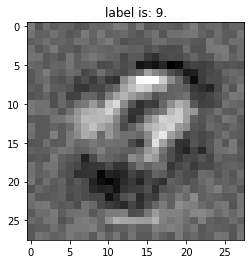

In [14]:
#Get weight and bias from model.parameters
weight, bias = list(model.parameters())
print(weight.shape)
print(bias.shape)

#show weight of lables
for i in range(10):
  plt.figure()
  #reshapee
  plt.imshow(weight[i].reshape(28,28).detach().numpy(), cmap='gray')
  plt.title(f"label is: {i}.")

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error ,mean_absolute_error
import torch
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('./ETA.csv')

In [17]:
# 1-difine X & Y then splite train and test
# 2-defin linear regression moudel
# 3-perdict y_pred
# 4-print MSE & MAE
#############################
      #input your code

#difine X & Y
X=df.drop('Time_Arrival',axis=1)
Y=df['Time_Arrival'].to_numpy()

#splite train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

#linear regression moudel
model = LinearRegression()

#perdict y_pred
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#MSE
mse=mean_squared_error(y_test,y_pred)
print(f"MSE: {mse}.")

#MAE
mae=mean_absolute_error(y_test,y_pred)
print(f"MAE: {mae}.")
#############################

MSE: 0.014897693200060904.
MAE: 0.08972154595801138.


In [18]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epoch = 3500

MSE: 0.5845910026282961.
MAE: 0.6150195950529567.


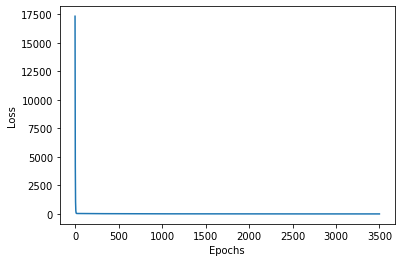

In [19]:
# 1-difine X & Y 
# 2-defin forward & loss function
# 3-write train loop
# 4-print MSE & MAE
# 5-plot loss
#############################
      #input your code

#difine X & Y

df = df.dropna()
#splite train and test
train, test = train_test_split(df,test_size=0.2)

# difine X & Y 
X_train = torch.tensor(train.drop('Time_Arrival',axis=1).values).T
Y_train = torch.tensor(train['Time_Arrival'].values)
X_test = torch.tensor(test.drop('Time_Arrival',axis=1).values).T
Y_test = torch.tensor(test['Time_Arrival'].values)

# 2-defin forward & loss function

def forward(X, w0, w1, w2, b):
  y_peredict = ((X[1] / X[0]) * w0) + (X[2] * w1) + (X[3] * w2) + b
  return y_peredict

def loss_fun(y_peredict, Y):
  loss = torch.mean((y_peredict - Y) ** 2)
  return loss

def train(X, Y, w0, w1, w2, b, step_size, epoch):
  losses = []
  optimizer = torch.optim.SGD([w0, w1, w2, b], lr=step_size)

  for i in range(epoch):
    optimizer.zero_grad()
    y_peredict = forward(X, w0, w1, w2, b)
    loss = loss_fun(y_peredict, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
  return w0, w1, w2, b, losses

w0, w1, w2, b, losses = train(X_train, Y_train, w0, w1, w2, b, step_size, epoch)
Y_pred = forward(X_test, w0, w1, w2, b)

#MSE
Y_pred = Y_pred.detach().numpy()
Y_test = Y_test.detach().numpy()

mse=mean_squared_error(Y_test,Y_pred)
print(f"MSE: {mse}.")

#MAE
mae=mean_absolute_error(Y_test,Y_pred)
print(f"MAE: {mae}.")


plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
#############################

In [20]:
# initialize parameter
w0 = torch.tensor(10.0, requires_grad=True)
w1 = torch.tensor(15.0, requires_grad=True)
w2 = torch.tensor(-10.0, requires_grad=True)
b = torch.tensor(-20.0, requires_grad=True)
step_size = 0.006  #  for optimiser GD
epoch = 3500

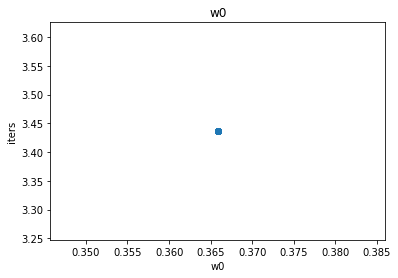

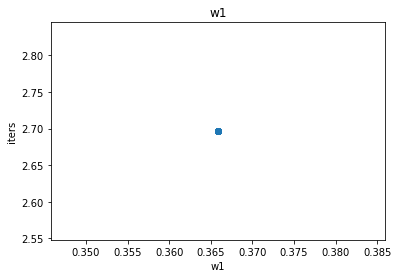

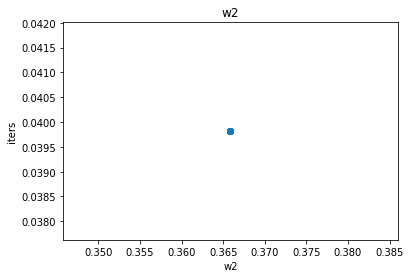

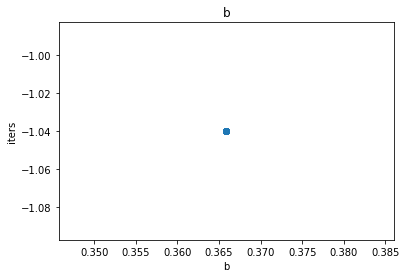

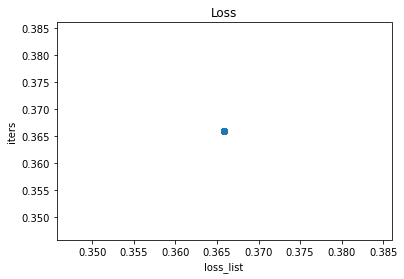

In [21]:
# 1-difine X & Y 
# 2-define subset of data
# 3-write train loop
# 4-plot & analysis w0,w1,w2,b,loss
#############################
      #input your code

def forward(X, w0, w1, w2, b):
  y_peredict = ((X[1] / X[0]) * w0) + (X[2] * w1) + (X[3] * w2) + b
  return y_peredict

def loss_fun(y_peredict, Y):
  loss = torch.mean((y_peredict - Y) ** 2)
  return loss


w0_list=[]
w1_list=[]
w2_list=[]
b_list=[]
loss_list=[]
iters=[]

# write train loop
for i in range(100):
  # subset of data
  df = df.sample(n=300)
  X = torch.tensor(df.drop('Time_Arrival',axis=1).values).T
  Y = torch.tensor(df['Time_Arrival'].values)

  w0 = torch.tensor(10.0, requires_grad=True)
  w1 = torch.tensor(15.0, requires_grad=True)
  w2 = torch.tensor(-10.0, requires_grad=True)
  b = torch.tensor(-20.0, requires_grad=True)
  optimizer = torch.optim.SGD([w0, w1, w2, b], lr=step_size)

  for i in range(epoch):
    optimizer.zero_grad()
    y_peredict = forward(X, w0, w1, w2, b)
    loss = loss_fun(y_peredict, Y)
    loss.backward()
    optimizer.step()

  w0_list.append(w0.item())
  w1_list.append(w1.item())
  w2_list.append(w2.item())
  b_list.append(b.item())
  loss_list.append(loss.item())
  iters.append(loss.item())


# plot
# W0
plt.scatter(iters,w0_list)
plt.ylabel('iters')
plt.xlabel('w0')
plt.title('w0')
plt.show()

# W1
plt.scatter(iters,w1_list)
plt.ylabel('iters')
plt.xlabel('w1')
plt.title('w1')
plt.show()

# W2
plt.scatter(iters,w2_list)
plt.ylabel('iters')
plt.xlabel('w2')
plt.title('w2')
plt.show()

# b
plt.scatter(iters,b_list)
plt.ylabel('iters')
plt.xlabel('b')
plt.title('b')
plt.show()

# Loss
plt.scatter(iters,loss_list)
plt.ylabel('iters')
plt.xlabel('loss_list')
plt.title('Loss')
plt.show()
#############################

Write all the parts yourself

In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv('heart_disease.csv')

In [24]:
# data and label

# delete non data
df = df.dropna()
X=df.drop("TenYearCHD",axis=1)
Y=df["TenYearCHD"]

# LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y)

# Score
clf.score(X, Y)

0.8484682713347921